In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima

with open(r'C:\Users\Dell\OneDrive\Documents\403 Phan Tich Du Lieu Kinh Doanh\PET_PRI_GND_DCUS_NUS_W.csv') as f:
    df = pd.read_csv(f)

# for col in df.columns:
#     if col != 'Date':
#         df[col] = df[col].astype('float64')
df['Date'] = pd.to_datetime(df['Date'])
df['ID']=df['Date']
# Set the 'ID' column as the index
df.set_index('ID', inplace=True)

# Filter the DataFrame to only include data after 2010
df = df[df.index > '2010-01-01']

df.info()
df.tail(20)
#R2 : Regular gas price
#M2 : Medium gas price
#P2 : Premium gas price

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 578 entries, 2010-01-04 to 2021-01-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    578 non-null    datetime64[ns]
 1   R2      578 non-null    float64       
 2   M2      578 non-null    float64       
 3   P2      578 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 22.6 KB


,Date,R2,M2,P2
ID,,,,
2020-09-14,2020-09-14,2.091,2.451,2.733
2020-09-21,2020-09-21,2.078,2.432,2.721
2020-09-28,2020-09-28,2.088,2.438,2.719
2020-10-05,2020-10-05,2.091,2.442,2.723
2020-10-12,2020-10-12,2.084,2.434,2.716
2020-10-19,2020-10-19,2.064,2.416,2.698
2020-10-26,2020-10-26,2.053,2.407,2.690
2020-11-02,2020-11-02,2.021,2.378,2.661
2020-11-09,2020-11-09,2.004,2.358,2.643


# Regular gas price

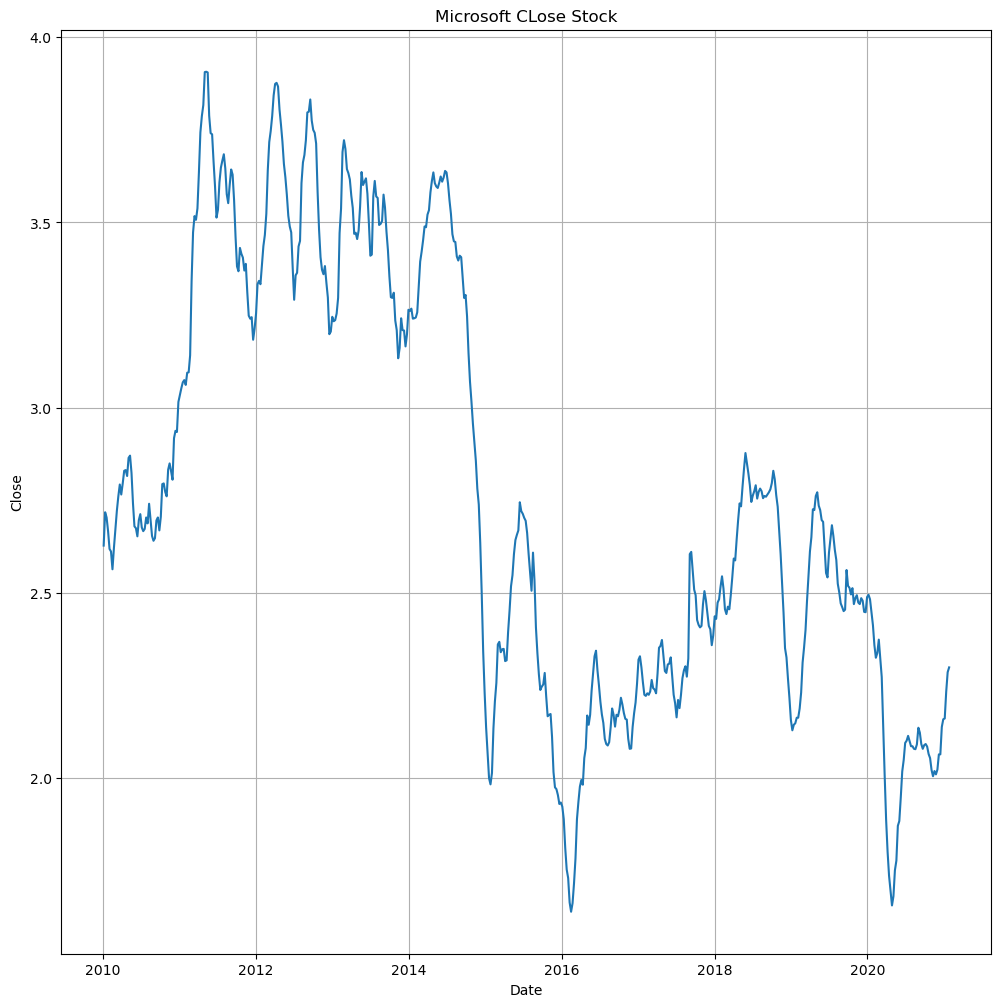

In [2]:
plt.figure(figsize=(12,12))
plt.plot(df['Date'],df['R2'])
plt.title('Microsoft CLose Stock')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.show()

## ADF Test

In [3]:
# ADF Test
series = df.loc[:, 'R2'].values
result = adfuller(series, autolag='AIC')
output = pd.Series(result[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
for key,values in result[4].items():
    output['critical value (%s)'%key] =  values
print(output)

Test Statistics                 -1.771297
p-value                          0.394802
No. of lags used                 1.000000
Number of observations used    576.000000
critical value (1%)             -3.441754
critical value (5%)             -2.866571
critical value (10%)            -2.569449
dtype: float64


## Auto fit ARIMA

In [4]:
# Split the data
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)
train = df.iloc[:train_size]['R2']
validate = df.iloc[train_size:train_size + val_size]['R2']
test = df.iloc[train_size + val_size:]['R2']

# Fit auto_arima
model_autoARIMA = auto_arima(train, 
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           m=0,
                           seasonal=False,
                           d=None,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(model_autoARIMA.summary())

# Make predictions on test and validation sets
test_predictions = model_autoARIMA.predict(n_periods=len(test))
validate_predictions = model_autoARIMA.predict(n_periods=len(validate))

# Forecast next 8 weeks
future_predictions = model_autoARIMA.predict(n_periods=8)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1207.729, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1321.795, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1300.935, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1209.717, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1319.865, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1319.876, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1317.907, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1323.791, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1321.860, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1321.866, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1302.930, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1319.905, Time=0.22 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.321 seconds
                               SARIMAX Results                              

In [5]:
#Identify RMSE and MAE the model
rmse = np.sqrt(mean_squared_error(validate, validate_predictions))
mae = mean_absolute_error(validate, validate_predictions)
print('Validate result:')
print(f'\nRMSE: {rmse}')
print(f'MAE: {mae}')

rmse = np.sqrt(mean_squared_error(test, test_predictions))
mae = mean_absolute_error(test, test_predictions)

print('Test result:')
print(f'\nRMSE: {rmse}')
print(f'MAE: {mae}')

Validate result:

RMSE: 0.2295647975001822
MAE: 0.1903389755041448
Test result:

RMSE: 0.3410292400244855
MAE: 0.2656744388174481


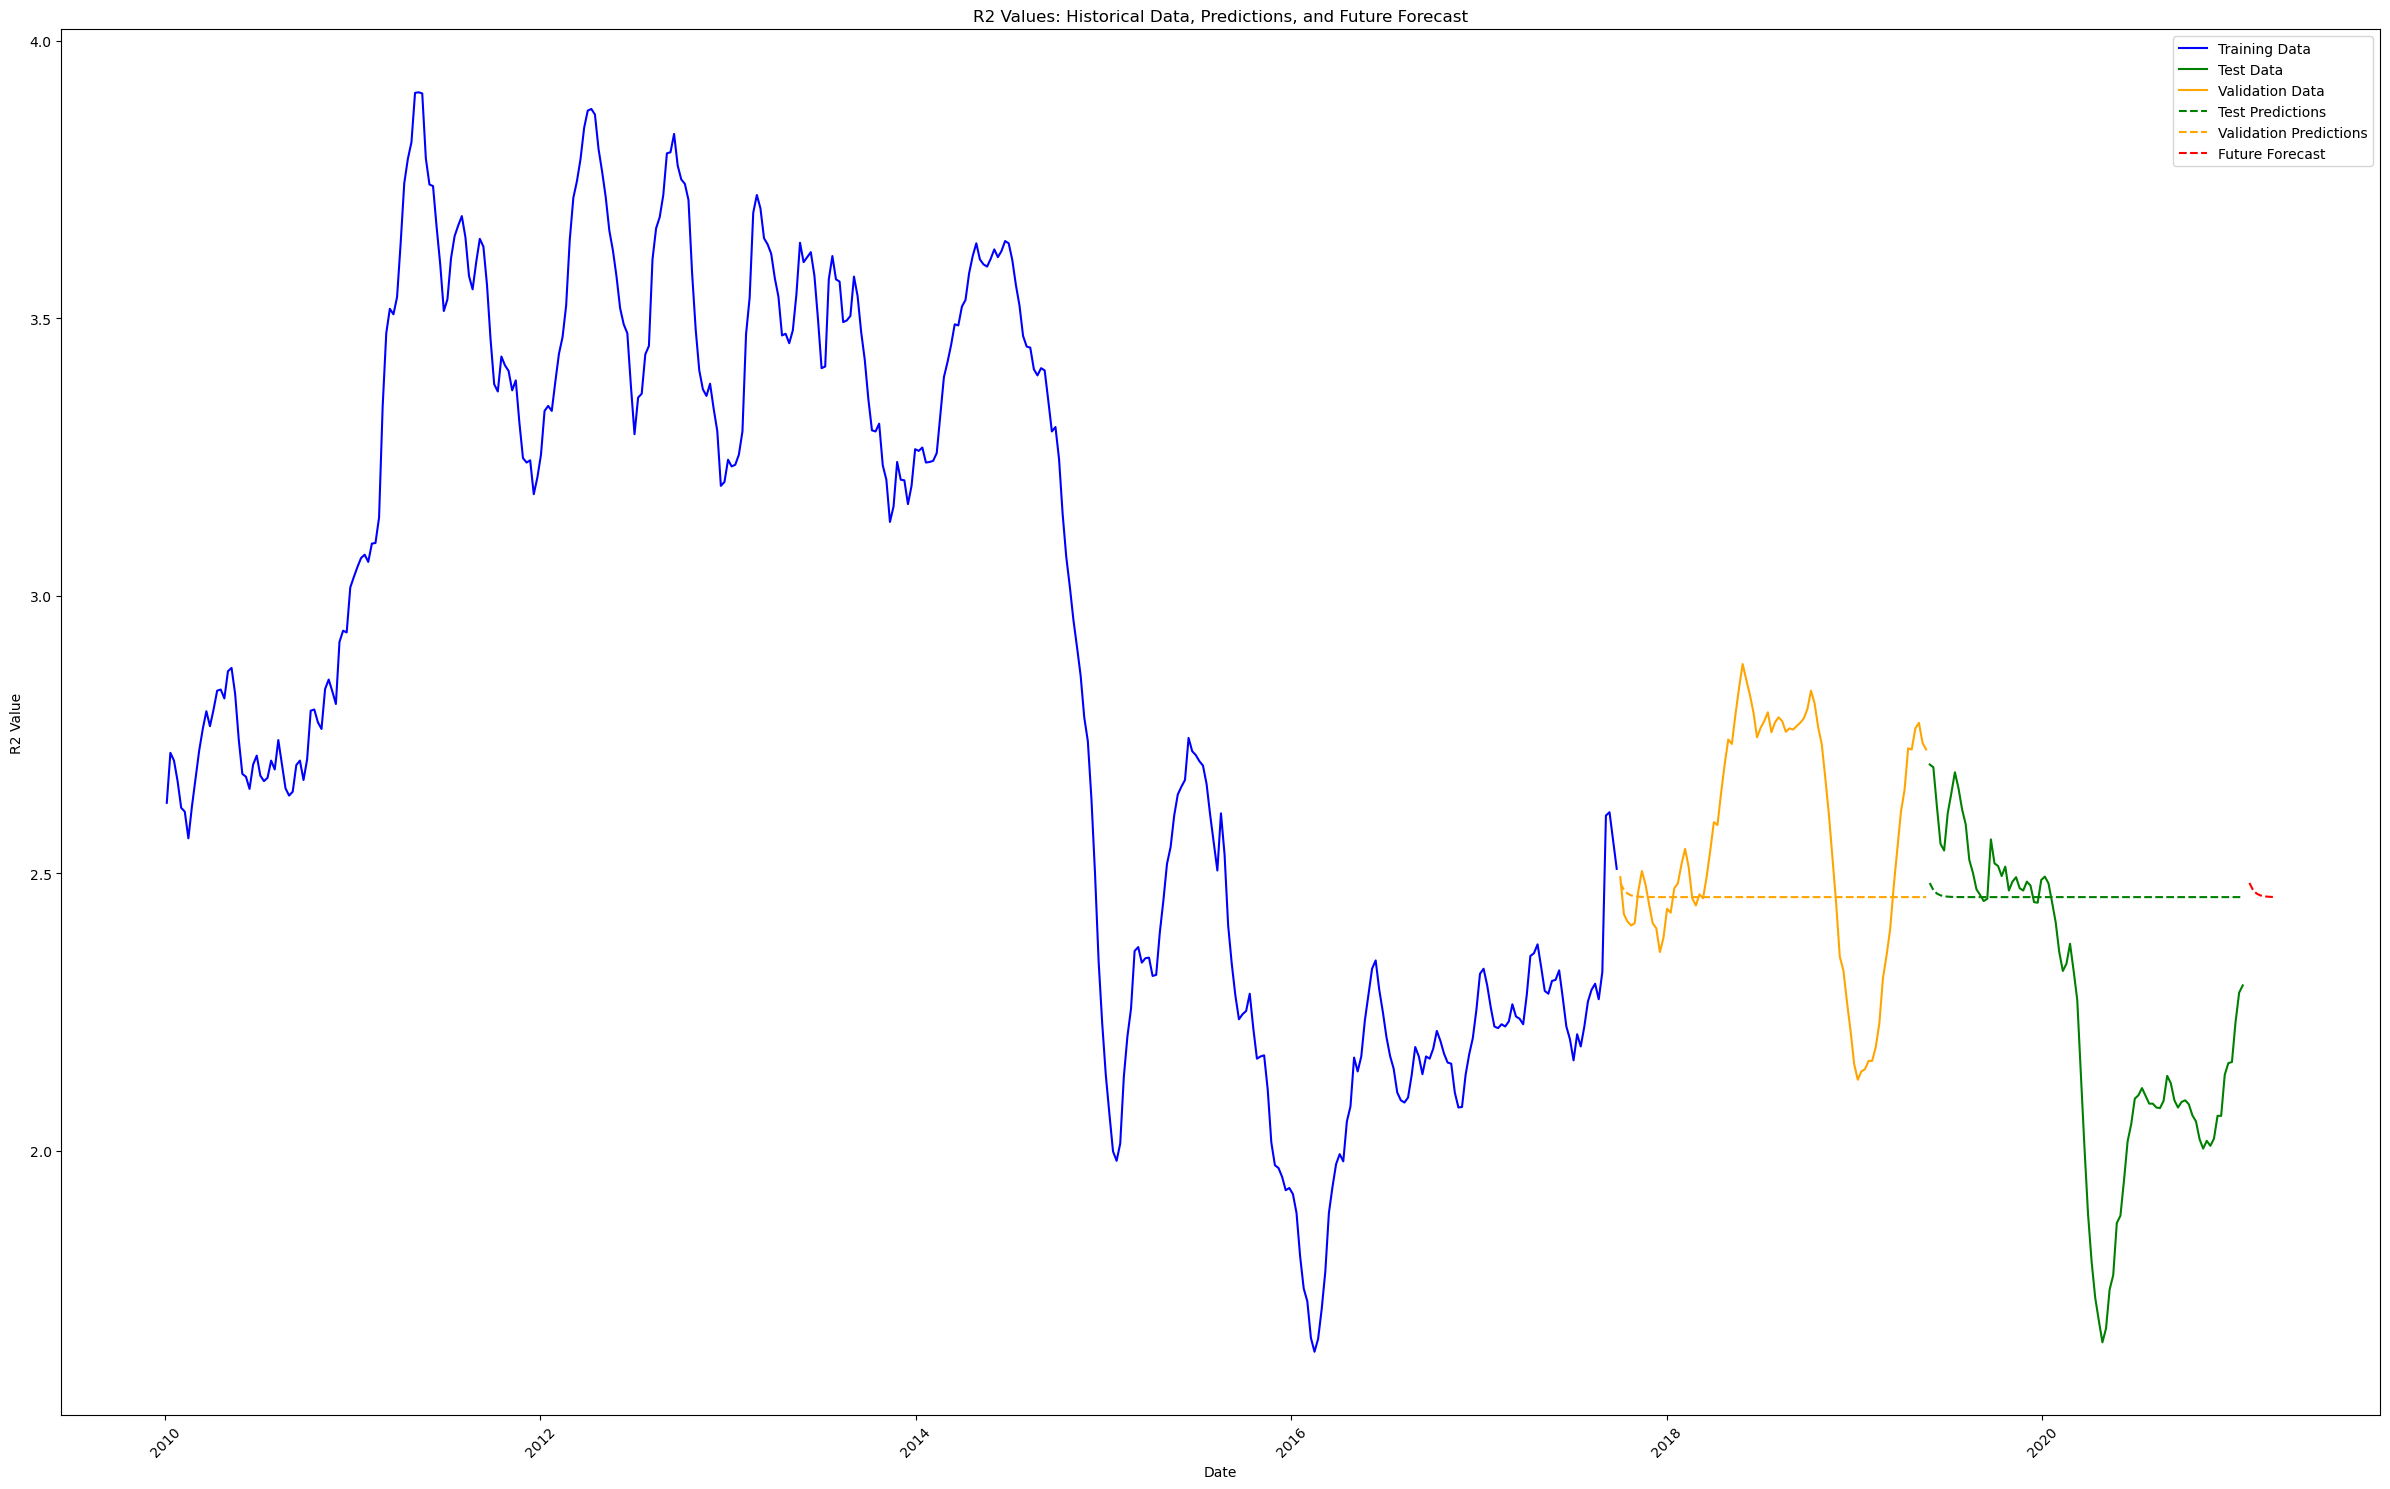

In [6]:
# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), 
                           periods=8, 
                           freq='W')


# Plot
plt.figure(figsize=(24, 15))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(validate.index, validate, label='Validation Data', color='orange')
plt.plot(test.index, test_predictions, label='Test Predictions', color='green', linestyle='--')
plt.plot(validate.index, validate_predictions, label='Validation Predictions', color='orange', linestyle='--')
plt.plot(future_dates, future_predictions, label='Future Forecast', color='red', linestyle='--')

plt.title('R2 Values: Historical Data, Predictions, and Future Forecast')
plt.xlabel('Date')
plt.ylabel('R2 Value')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Medium gas price

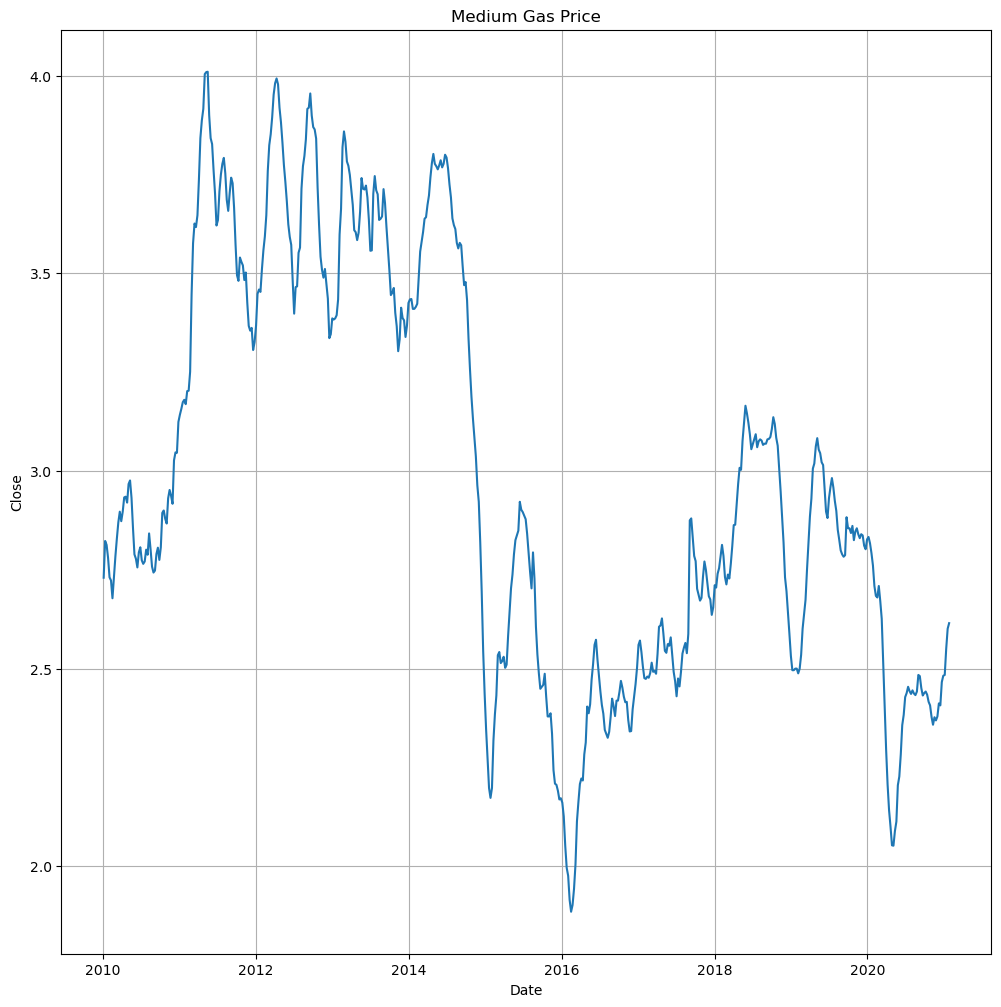

In [7]:
plt.figure(figsize=(12,12))
plt.plot(df['Date'],df['M2'])
plt.title('Medium Gas Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.show()

## ADF Test

In [8]:
# ADF Test
series = df.loc[:, 'M2'].values
result = adfuller(series, autolag='AIC')
output = pd.Series(result[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
for key,values in result[4].items():
    output['critical value (%s)'%key] =  values
print(output)

Test Statistics                 -2.360180
p-value                          0.153292
No. of lags used                 4.000000
Number of observations used    573.000000
critical value (1%)             -3.441814
critical value (5%)             -2.866597
critical value (10%)            -2.569463
dtype: float64


## Auto ARIMA

In [9]:
# Split the data
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)
train = df.iloc[:train_size]['M2']
validate = df.iloc[train_size:train_size + val_size]['M2']
test = df.iloc[train_size + val_size:]['M2']

# Fit auto_arima
model_autoARIMA = auto_arima(train, 
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           m=0,
                           seasonal=False,
                           d=None,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(model_autoARIMA.summary())

# Make predictions on test and validation sets
test_predictions = model_autoARIMA.predict(n_periods=len(test))
validate_predictions = model_autoARIMA.predict(n_periods=len(validate))

# Forecast next 8 weeks
future_predictions = model_autoARIMA.predict(n_periods=8)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1236.674, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1358.508, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1335.165, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1238.671, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1356.578, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1356.591, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1354.631, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1360.500, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1358.575, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1358.578, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1337.161, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1356.628, Time=0.19 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.367 seconds
                               SARIMAX Results                              

In [10]:
#Identify RMSE and MAE the model
rmse = np.sqrt(mean_squared_error(validate, validate_predictions))
mae = mean_absolute_error(validate, validate_predictions)
print('Validate result:')
print(f'\nRMSE: {rmse}')
print(f'MAE: {mae}')

rmse = np.sqrt(mean_squared_error(test, test_predictions))
mae = mean_absolute_error(test, test_predictions)

print('Test result:')
print(f'\nRMSE: {rmse}')
print(f'MAE: {mae}')

Validate result:

RMSE: 0.23524525773990243
MAE: 0.19176237059022058
Test result:

RMSE: 0.293946411982548
MAE: 0.24403930294416726


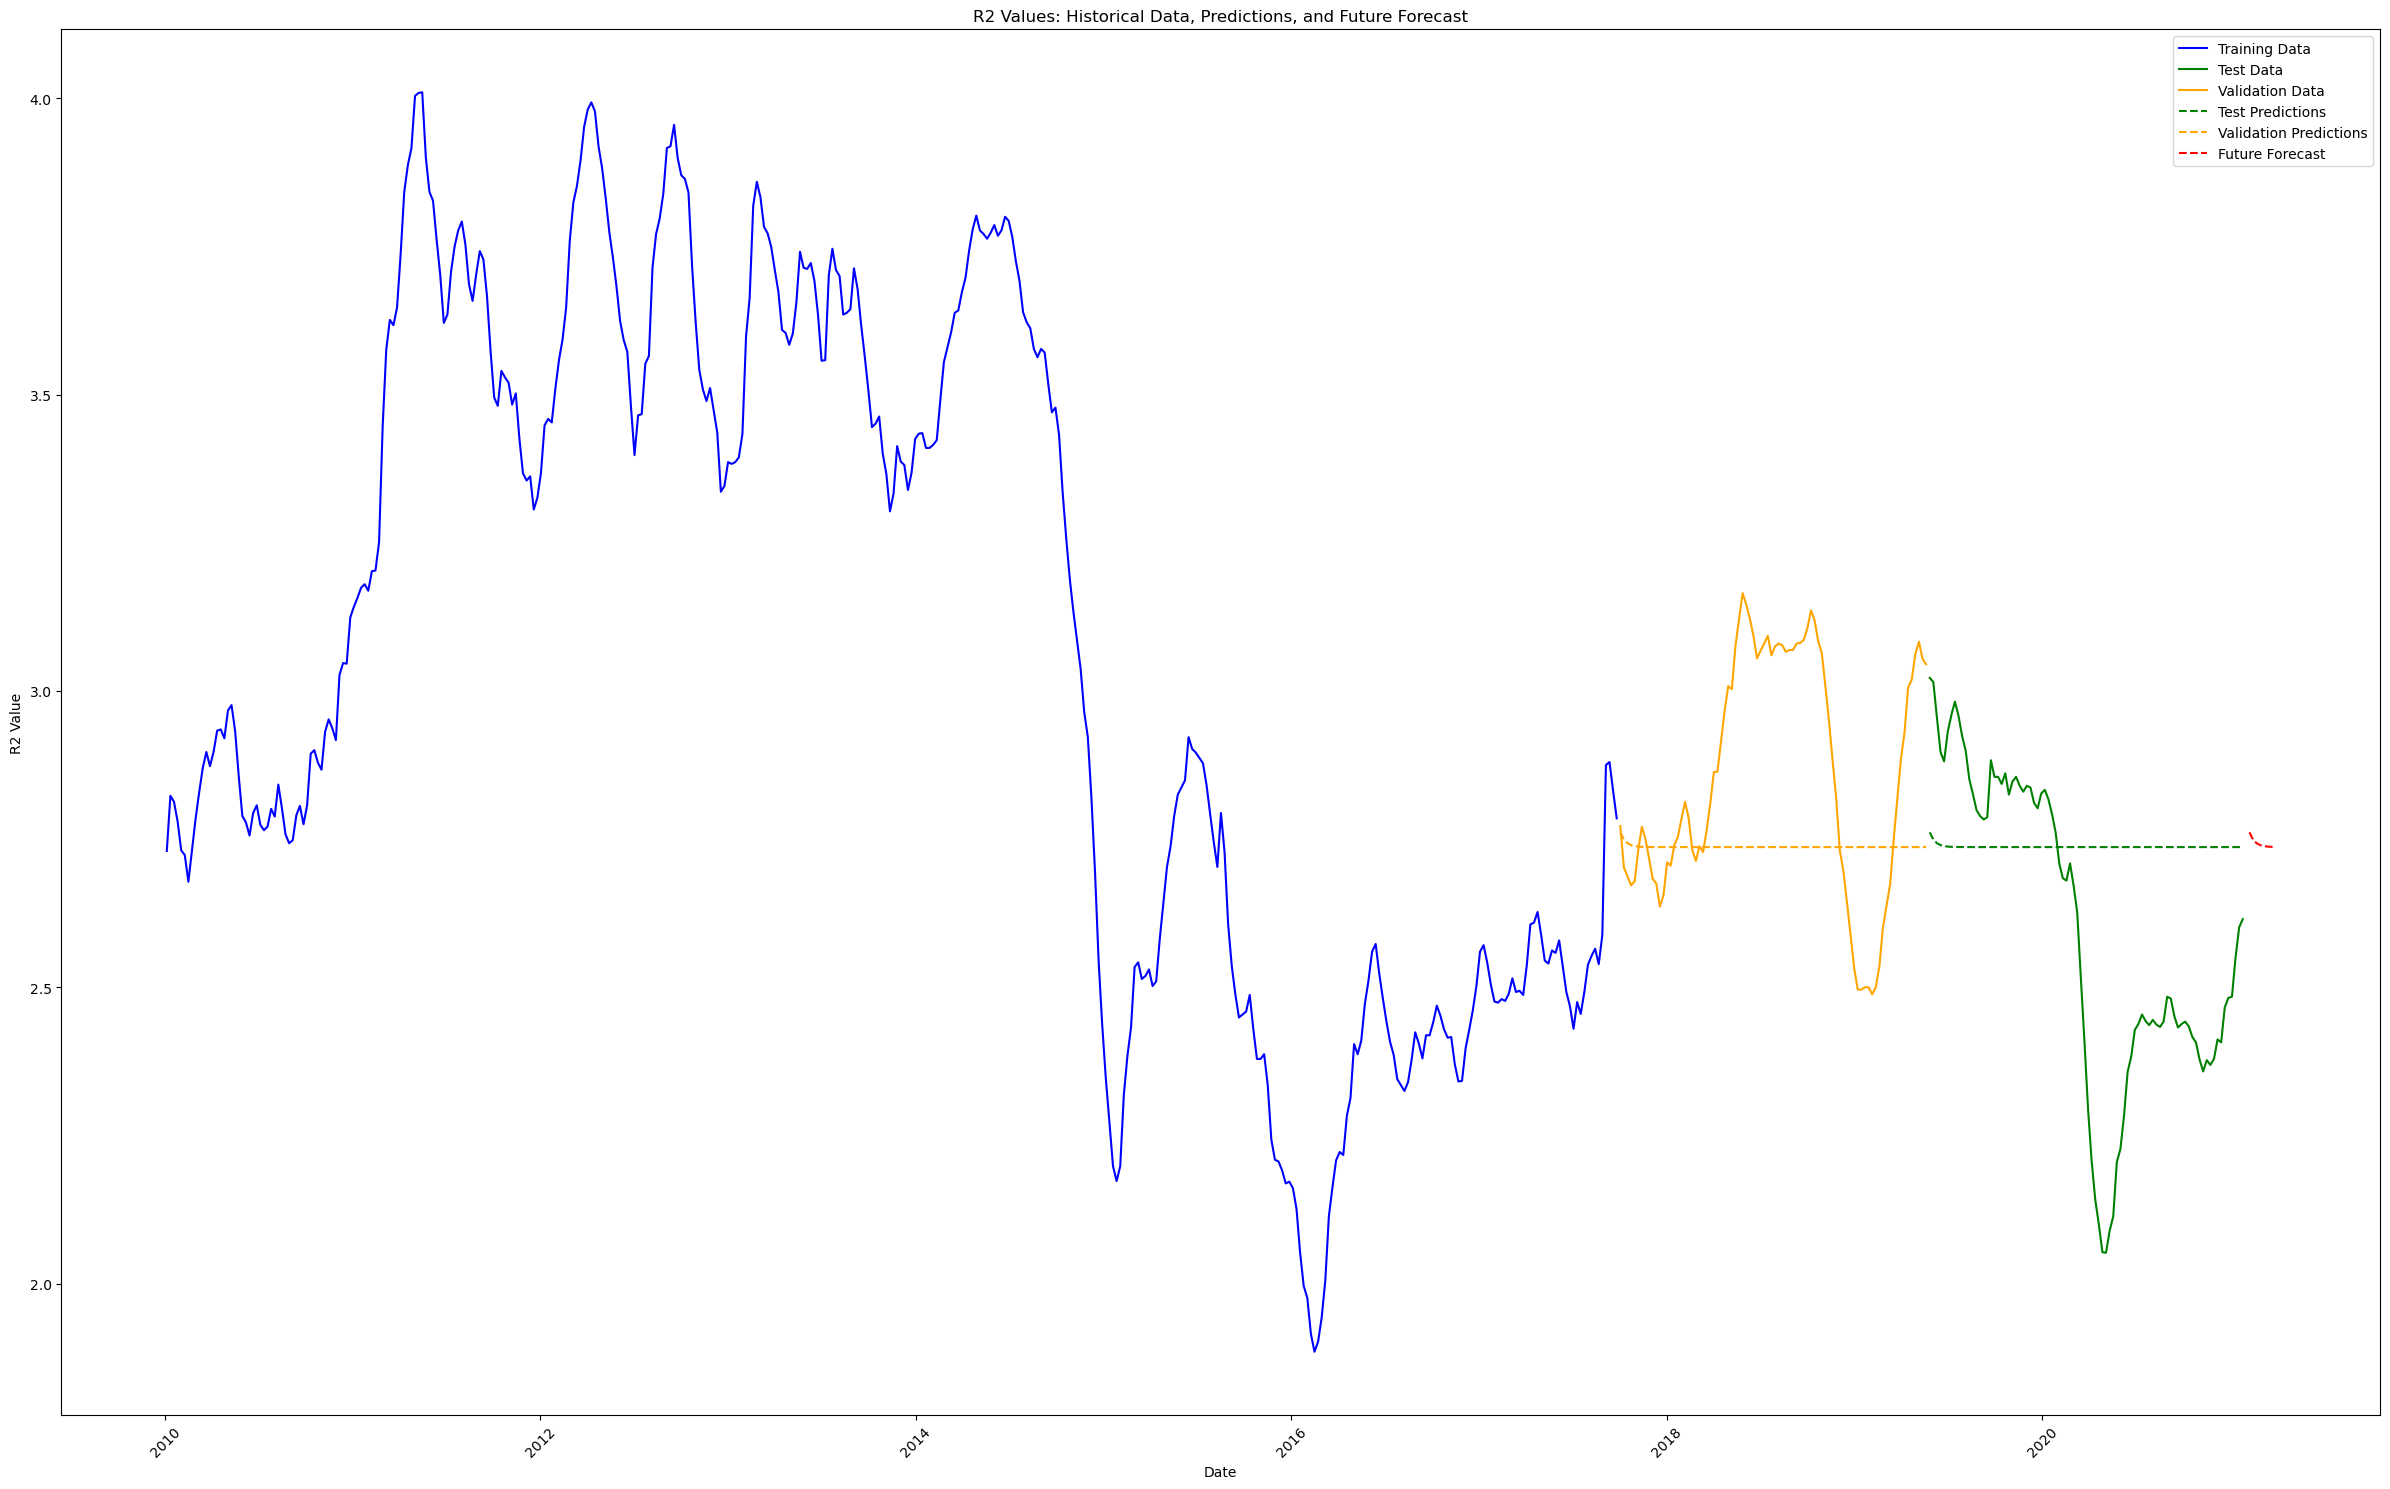

In [11]:
# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), 
                           periods=8, 
                           freq='W')


# Plot
plt.figure(figsize=(24, 15))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(validate.index, validate, label='Validation Data', color='orange')
plt.plot(test.index, test_predictions, label='Test Predictions', color='green', linestyle='--')
plt.plot(validate.index, validate_predictions, label='Validation Predictions', color='orange', linestyle='--')
plt.plot(future_dates, future_predictions, label='Future Forecast', color='red', linestyle='--')

plt.title('R2 Values: Historical Data, Predictions, and Future Forecast')
plt.xlabel('Date')
plt.ylabel('R2 Value')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Premium gas price

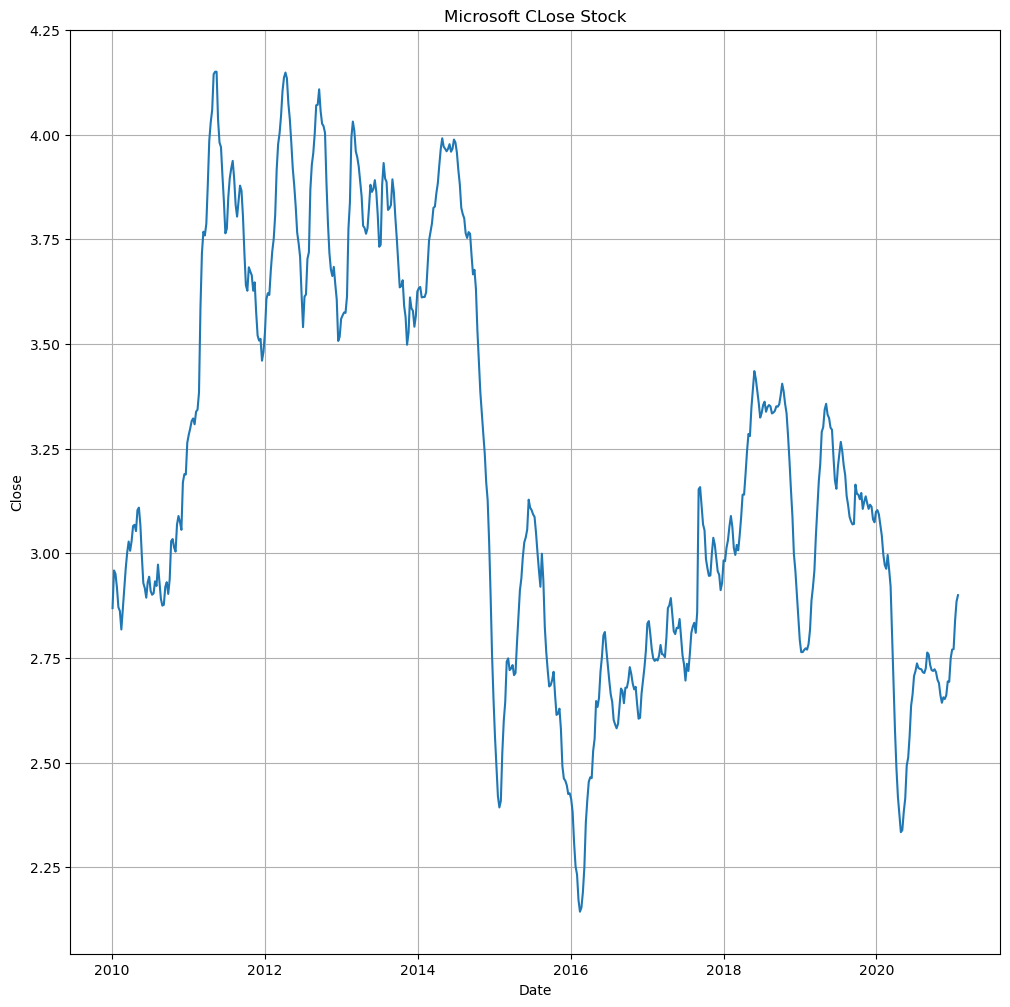

In [12]:
plt.figure(figsize=(12,12))
plt.plot(df['Date'],df['P2'])
plt.title('Microsoft CLose Stock')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.show()

## ADF Test

In [13]:
# ADF Test
series = df.loc[:, 'P2'].values
result = adfuller(series, autolag='AIC')
output = pd.Series(result[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
for key,values in result[4].items():
    output['critical value (%s)'%key] =  values
print(output)

Test Statistics                 -2.544288
p-value                          0.105067
No. of lags used                 4.000000
Number of observations used    573.000000
critical value (1%)             -3.441814
critical value (5%)             -2.866597
critical value (10%)            -2.569463
dtype: float64


## Auto fit ARIMA

In [14]:
# Split the data
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)
train = df.iloc[:train_size]['P2']
validate = df.iloc[train_size:train_size + val_size]['P2']
test = df.iloc[train_size + val_size:]['P2']

# Fit auto_arima
model_autoARIMA = auto_arima(train, 
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           m=0,
                           seasonal=False,
                           d=None,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(model_autoARIMA.summary())

# Make predictions on test and validation sets
test_predictions = model_autoARIMA.predict(n_periods=len(test))
validate_predictions = model_autoARIMA.predict(n_periods=len(validate))

# Forecast next 8 weeks
future_predictions = model_autoARIMA.predict(n_periods=8)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1247.805, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1370.868, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1347.786, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1249.767, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1368.983, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1369.003, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1367.055, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1372.845, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1370.963, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1370.974, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1349.757, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1369.036, Time=0.18 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.510 seconds
                               SARIMAX Results                              

In [15]:
#Identify RMSE and MAE the model
rmse = np.sqrt(mean_squared_error(validate, validate_predictions))
mae = mean_absolute_error(validate, validate_predictions)
print('Validate result:')
print(f'\nRMSE: {rmse}')
print(f'MAE: {mae}')

rmse = np.sqrt(mean_squared_error(test, test_predictions))
mae = mean_absolute_error(test, test_predictions)

print('Test result:')
print(f'\nRMSE: {rmse}')
print(f'MAE: {mae}')

Validate result:

RMSE: 0.22829189031840752
MAE: 0.18851062218523496
Test result:

RMSE: 0.2951234303665584
MAE: 0.24314847219488886


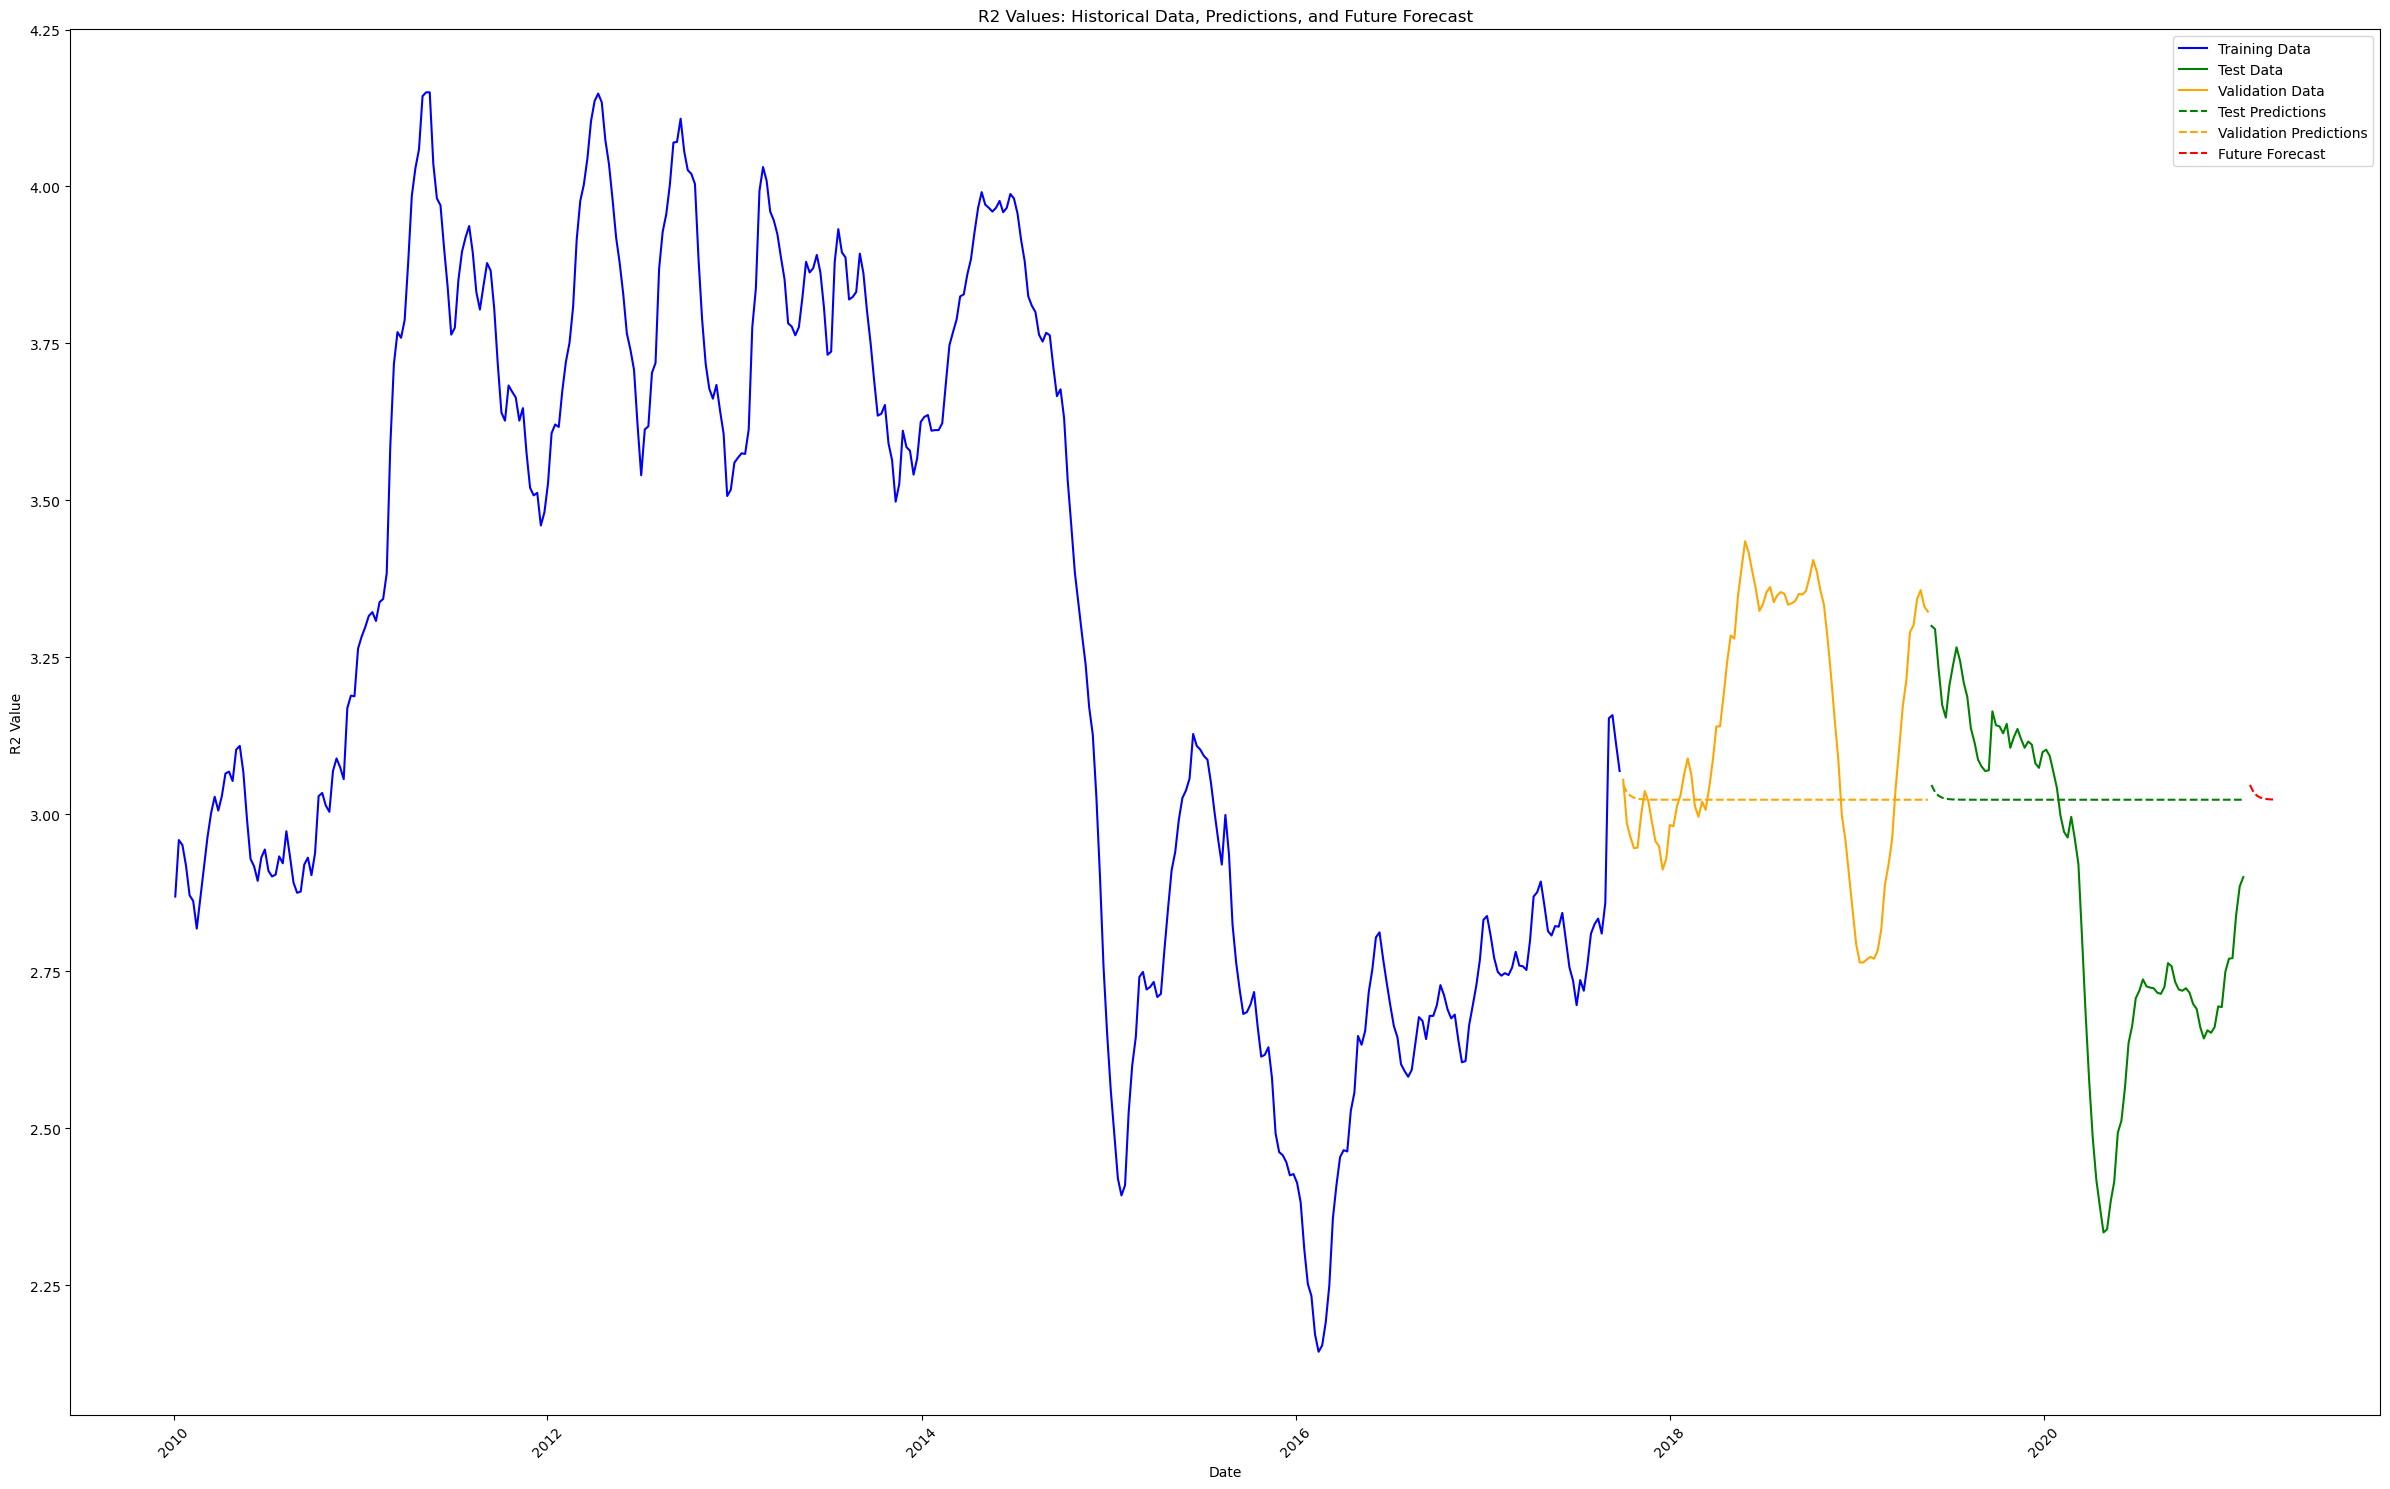

In [16]:
# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), 
                           periods=8, 
                           freq='W')


# Plot
plt.figure(figsize=(24, 15))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(validate.index, validate, label='Validation Data', color='orange')
plt.plot(test.index, test_predictions, label='Test Predictions', color='green', linestyle='--')
plt.plot(validate.index, validate_predictions, label='Validation Predictions', color='orange', linestyle='--')
plt.plot(future_dates, future_predictions, label='Future Forecast', color='red', linestyle='--')

plt.title('R2 Values: Historical Data, Predictions, and Future Forecast')
plt.xlabel('Date')
plt.ylabel('R2 Value')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()